![revit](https://i.ibb.co/bQ3dB8C/curso-revit.png)


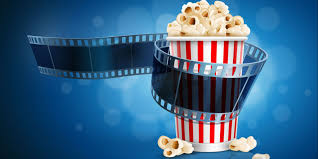




Proyecto de CLientes de cine 

Integrantes : - Luis Enriquez Vilca

              Diana Sanchez Rivera
  



##  Análisis de Componentes Principales

In [ ]:
##import sys
##!conda install --yes --prefix {sys.prefix} plotly

In [12]:
import pandas as pd
import numpy as np
##import plotly as py
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import os 

matplotlib.rcParams['figure.figsize'] = [8, 8]
np.random.seed(42)

In [32]:
carpeta = "C:/Users/luis.enriquez/Desktop/ciencia de datos"
archivo = "cine.csv"
# Para concatenar cadenas usamos el +
fullpath = os.path.join(carpeta, archivo)

In [39]:
import seaborn as sns
%matplotlib inline

In [35]:
cine = pd.read_csv(fullpath,sep = ";")

In [37]:
cine.head(15)

,edad,indicador_frecuencia_find_semana,total_dulceria,total_boleteria,canal_venta_preferido,categ_venta
0,22,0.3333,50.5,91.0,Complejos,0
1,46,0.2000,275.0,206.0,Complejos,0
2,34,0.3333,40.0,181.0,Complejos,0
3,24,0.0000,67.5,33.0,Complejos,0
4,18,0.0000,0.0,29.0,Complejos,0
5,40,1.0000,0.0,30.0,Tienda Web,1
6,23,0.3333,52.5,93.5,Complejos,0
7,42,1.0000,63.5,38.0,Complejos,0
8,27,0.2222,450.0,668.0,Tienda Web,1
9,18,0.6000,93.5,158.5,Complejos,0


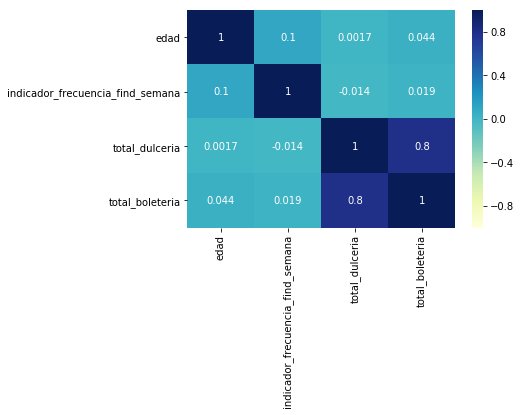

In [40]:
sns.heatmap(cine[cine.columns[:4]].corr(), vmin=-1, vmax=1, annot = True, cmap="YlGnBu")

C:\Users\luis.enriquez\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


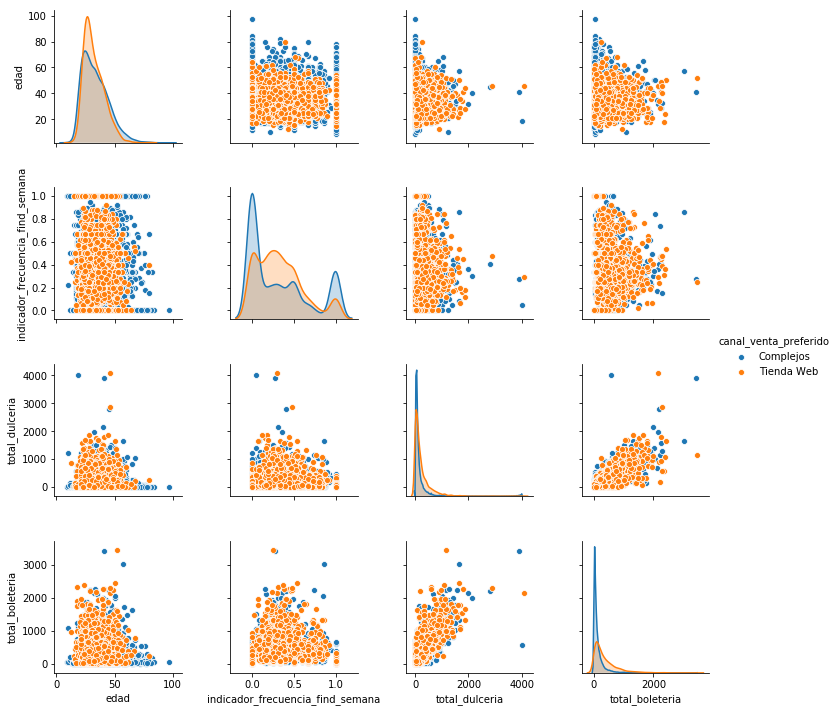

In [43]:
sns.pairplot(cine[cine.columns[0:5]],  hue = 'canal_venta_preferido')

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X = cine.iloc[:,0:4].values
y = cine.iloc[:,4].values
#X_std = StandardScaler().fit_transform(X)

scaler = MinMaxScaler(feature_range=[0, 1])
X_std = scaler.fit_transform(X)

In [45]:
pd.DataFrame(X_std).head()

,0,1,2,3
0,0.147727,0.3333,0.012356,0.026307
1,0.420455,0.2000,0.067287,0.059553
2,0.284091,0.3333,0.009787,0.052326
3,0.170455,0.0000,0.016516,0.009540
4,0.102273,0.0000,0.000000,0.008384


In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
_pca = pca.fit_transform(X_std)

In [53]:
pca.components_

array([[ 4.02553526e-02,  9.99177433e-01, -1.99669739e-03,
         4.46962272e-03],
       [ 9.97885849e-01, -4.03932302e-02,  1.43288131e-02,
         4.88559562e-02],
       [-4.92110871e-02, -7.81472687e-04,  5.22396120e-01,
         8.51281359e-01],
       [ 1.34761972e-02,  3.49771239e-03,  8.52580197e-01,
        -5.22410917e-01]])

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.84328271, 0.94292307, 0.99509804, 1.        ])

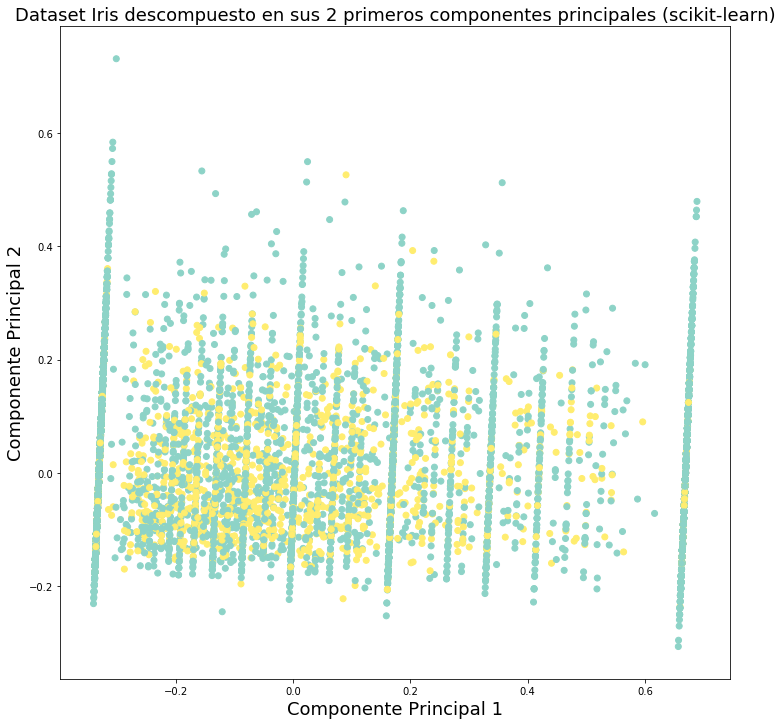

In [54]:
fig = plt.figure(figsize=(12,12))
plt.scatter(canal_venta_preferido_pca[:,0], cine_pca[:,1], c=cine.categ_venta, 
            cmap=cm.Set3)
plt.title("Dataset Iris descompuesto en sus 2 primeros componentes principales (scikit-learn)", size=18)
plt.xlabel("Componente Principal 1", size=18)
plt.ylabel("Componente Principal 2", size=18);

##Agrupamiento - Clustering - K means

In [82]:
datos_numericos = cine[["edad","indicador_frecuencia_find_semana","total_dulceria","total_boleteria"]]
datos_categoricos = cine[["canal_venta_preferido"]]

In [87]:
from sklearn.preprocessing import MinMaxScaler

datos_numericos_normalizado = MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizado = pd.DataFrame(datos_numericos_normalizado,
                                               columns=datos_numericos.columns) 

C:\Users\luis.enriquez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [88]:
datos_categoricos_codificados = pd.get_dummies(datos_categoricos, drop_first=True)

In [89]:
cine2= pd.concat([datos_numericos_normalizado, datos_categoricos_codificados], axis=1)

In [97]:
from sklearn.cluster import KMeans

In [100]:
estimador_kmedias = KMeans(random_state=42, n_clusters=3)

estimador_kmedias.fit(cine2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [101]:
clusters = estimador_kmedias.labels_
clusters

array([2, 2, 2, ..., 0, 0, 0])

In [102]:
centroides = estimador_kmedias.cluster_centers_
centroides

array([[ 3.00417325e-01,  7.72806097e-01,  1.93261643e-02,
         3.75833981e-02, -1.99840144e-15],
       [ 2.65482880e-01,  3.38931587e-01,  5.60030571e-02,
         1.07460173e-01,  1.00000000e+00],
       [ 2.70491202e-01,  9.17591841e-02,  2.52128910e-02,
         4.14897026e-02, -2.71171974e-14]])

In [103]:
pd.DataFrame(centroides)

,0,1,2,3,4
0,0.300417,0.772806,0.019326,0.037583,-1.998401e-15
1,0.265483,0.338932,0.056003,0.107460,1.000000e+00
2,0.270491,0.091759,0.025213,0.041490,-2.711720e-14


In [104]:
estimador_kmedias.inertia_

613.7049644025632